In [4]:
!pip3 install sympy
!pip3 install mpmath

     |████████████████████████████████| 5.6MB 186kB/s eta 0:00:01
     |████████████████████████████████| 522kB 200kB/s eta 0:00:01
  Running setup.py install for mpmath ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import numpy as np
import math 
import csv 

In [9]:
##### FUNCTIONS REQUIRED TO HANDLE DATA 

def twoComplementAdd(x, y):
    sizeArray = x.shape[0]

    x_1 = np.copy(x)
    y_1 = np.copy(y)
    x_tmp = np.flip(x_1)
    y_tmp = np.flip(y_1)
    z_tmp = np.zeros(sizeArray)
    carry = False 
    
    for i in range (0, sizeArray):
        
        if (x_tmp[i] + y_tmp[i] == 2 and carry == False):
            z_tmp[i] = 0
            carry = True
        elif (x_tmp[i] + y_tmp[i] == 2 and carry == True): 
            z_tmp[i] = 1
            carry = True
        elif (x_tmp[i] + y_tmp[i] == 1 and carry == False):
            z_tmp[i] = 1
            carry = False
        elif (x_tmp[i] + y_tmp[i] == 1 and carry == True):
            z_tmp[i] = 0
            carry = True
        elif (x_tmp[i] + y_tmp[i] == 0 and carry == False):
            z_tmp[i] = 0
            carry = False
        elif (x_tmp[i] + y_tmp[i] == 0 and carry == True):
            z_tmp[i] = 1
            carry = False
    
    return np.flip(z_tmp)



def twoComplementSub(x, y):
    sizeArray = x.shape[0]
    
    x_2 = np.copy(x)
    y_2 = np.copy(y)
    for i in range(0, sizeArray):
        if (y_2[i] == 0):
            y_2[i] = 1
        else:
            y_2[i] = 0 

    arrayOne = np.concatenate((np.zeros((sizeArray-1,), dtype=int), np.ones((1,), dtype=int) ))
    y_tmp_added = twoComplementAdd(y_2, arrayOne) 
    finalOutput = twoComplementAdd(y_tmp_added, x_2)

    return finalOutput     
    
print(twoComplementAdd(np.array([1, 0, 1, 1]), np.array([1,0,0,0])))
print(twoComplementSub(np.array([0, 1, 1, 0]), np.array([0,0,1,0])))
print(twoComplementAdd(np.array([0, 1, 1, 0]), np.array([1,1,1,0])))

listExample = (2,4,5,7)



def hex2dec(hexadecimal, width, prec):

  hexList = ['0000', '0', 
             '0001', '1', 
             '0010', '2',
             '0011', '3',
             '0100', '4',
             '0101', '5',
             '0110', '6',
             '0111', '7',
             '1000', '8',
             '1001', '9',
             '1010', 'a',
             '1011', 'b',
             '1100', 'c',
             '1101', 'd',
             '1110', 'e',
             '1111', 'f']

  binary = []
  for i in range(0, len(hexadecimal)):
    for j, sequence in enumerate(hexList):
      if (j % 2 == 1):
        if (sequence == hexadecimal[i]):
          binary.append(hexList[j - 1])
  
  strBinary = ''.join(str(e) for e in binary)
  #print(strBinary)

  decimal = 0
  for i in range(0, width):
    if (strBinary[i:i+1] == '1'): 
      decimal = decimal + (2 ** (width - prec - i - 1))
  


  return decimal

import numpy as np

def dec2binTwosComplement (val, width = 64, prec = 62):
  
  # Check for negative decimal input
  neg = False
  if (val < 0):
    val = -val
    neg = True

  # Normal decimal to fixed point binary conversion
  binary = []; 
  for i in range(width):
    test = val - (2 ** (width - prec - i - 1))
    if (test < 0):
      binary.append(0)
    else:
      binary.append(1)
      val = test
  

  # Flip array 
  binaryArray = np.flip(np.array(binary))
  # Negate with 1's complement
  if (neg == True):
    for i in range (0, len(binary)):
      if (binaryArray[i] == 0):
        binaryArray[i] = 1
      else:
        binaryArray[i] = 0

    

    ## Turn into 2's complement
    done = False
    for i in range(0, len(binary)):
      add = binaryArray[i] + 1
      if (add == 2 and done == False):
        binaryArray[i] = 0
      elif (done == False):
        binaryArray[i] = 1
        done = True
  
    
  return np.flip(binaryArray)

# binary should be numpy array 
def bin2hex (binary):
  
  hexList = ['0000', '0', 
             '0001', '1', 
             '0010', '2',
             '0011', '3',
             '0100', '4',
             '0101', '5',
             '0110', '6',
             '0111', '7',
             '1000', '8',
             '1001', '9',
             '1010', 'a',
             '1011', 'b',
             '1100', 'c',
             '1101', 'd',
             '1110', 'e',
             '1111', 'f']
    
  hexSequence = []
  for i in range(0, round(len(binary)/4)):
    fourBits = binary[4*i:4*i + 4]
    fourBitsStr = ''.join(str(e) for e in list(fourBits))
    #print(fourBits)
    for j, sequence in enumerate(hexList):
      if (j % 2 == 0):
        if (sequence == fourBitsStr):
          hexSequence.append(hexList[j + 1])

  return hexSequence 


def hex2dec(hexadecimal, width, prec):

  hexList = ['0000', '0', 
             '0001', '1', 
             '0010', '2',
             '0011', '3',
             '0100', '4',
             '0101', '5',
             '0110', '6',
             '0111', '7',
             '1000', '8',
             '1001', '9',
             '1010', 'a',
             '1011', 'b',
             '1100', 'c',
             '1101', 'd',
             '1110', 'e',
             '1111', 'f']

  binary = []
  for i in range(0, len(hexadecimal)):
    for j, sequence in enumerate(hexList):
      if (j % 2 == 1):
        if (sequence == hexadecimal[i]):
          binary.append(hexList[j - 1])
  
  strBinary = ''.join(str(e) for e in binary)
  #print(strBinary)

  decimal = 0
  for i in range(0, width):
    if (strBinary[i:i+1] == '1'): 
      decimal = decimal + (2 ** (width - prec - i - 1))
  
  if (strBinary[0] == '1'):
    decimal = decimal - 2**(width - prec ) 


  return decimal



print(np.array2string(dec2binTwosComplement (-1.234425, 64, 62)))
print(''.join(str(e) for e in bin2hex(dec2binTwosComplement (-1.234425, 64, 62))))

mul = 1
# calculate initial X_in 
for i in range(0, 17):
    mul = mul * math.sqrt((1 + 2 ** (-2*i)))

X_in = np.array(dec2binTwosComplement(1/mul, 32, 32-2), dtype=int)
print(''.join(str(e) for e in X_in))

[0. 0. 1. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
b0ff2e48e8a71c00
00100110110111010011101101101010


In [7]:
####################### LET'S SIMULATE CORDIC WITH N STAGES AND N BITS ################################


# GENERATE RANDOM INPUTS WITH SIZE 
size = 50000
inputArray = np.random.random(size=(1, size))*2 - 1 
outputArray = np.cos(inputArray)



#np.set_printoptions(threshold=sys.maxsize)

final = np.concatenate((inputArray, outputArray), axis=0)


with open('resultTable_18_stages.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)

    for j in range (16, 64, 4):
        

        # GENERATE ANGLE TABLE 
        atan_Table = np.zeros((32, j))
        for angleStep in range (32):
            angleRad = math.atan(math.pow(2, -angleStep))
            atan_Table[angleStep, :] = np.array(dec2binTwosComplement(angleRad, j, j-2))
        
        npInputArray     = np.zeros((size, j), dtype = int)
        npTestbenchArray = np.zeros((size, 64), dtype = int)
        
        #transform random input data from decimal to 2's complement binary
        for i in range(0, len(final[0,:])):
            npInputArray[i, :]     = dec2binTwosComplement(final[0, i], width = j, prec = j-2)

        #transform testbench data from decimal to 2's complement binary
        for i in range(0, len(final[1,:])):
            npTestbenchArray[i, :] = (dec2binTwosComplement(final[1, i], width = 64, prec = 64-2))
            
            
        for stages in range(18, 20, 2):
            
            mul = 1 
            # calculate initial X_in 
            for i in range(0, stages - 1):
                mul = mul * math.sqrt((1 + 2 ** (-2*i)))
             
            for test in range (0, size):
                # initialize x, y and z values
                X_in = np.array(dec2binTwosComplement(1/mul, j, j-2), dtype=int)
                Y_in = np.array(dec2binTwosComplement(0    , j, j-2), dtype=int)
                Z_in = npInputArray[test, :]


                # flip numpy array - make the little endian 
                for step in range(0, stages):
                    


                    # sign shift X and Y 
                    if  (X_in[0] == 0 and step <= j):
                        x_shr = np.concatenate((np.zeros(step, dtype=int), X_in[0:j-step]))
                    elif(X_in[0] == 1 and step <= j):
                        x_shr = np.concatenate((np.ones(step, dtype=int), X_in[0:j-step]))
                    elif(X_in[0] == 0 and step  > j):
                        x_shr = np.zeros(j, dtype=int)
                    elif(X_in[0] == 1 and step  > j):
                        x_shr = np.ones(j, dtype=int)

                    if  (Y_in[0] == 0 and step <= j):
                        y_shr = np.concatenate((np.zeros(step, dtype=int), Y_in[0:j-step]))
                    elif(Y_in[0] == 1 and step <= j):
                        y_shr = np.concatenate((np.ones(step, dtype=int), Y_in[0:j-step]))
                    elif(Y_in[0] == 0 and step  > j):
                        y_shr = np.zeros(j, dtype=int)
                    elif(Y_in[0] == 1 and step  > j):
                        y_shr = np.ones(j, dtype=int)
                    


                    # if z_in sign is positive  
                    if (Z_in[0] == 0):
                        X_out = twoComplementSub(X_in, y_shr)
                        Y_out = twoComplementAdd(Y_in, x_shr)
                        Z_out = twoComplementSub(Z_in, atan_Table[step])
                    else:
                        X_out = twoComplementAdd(X_in, y_shr)
                        Y_out = twoComplementSub(Y_in, x_shr)
                        Z_out = twoComplementAdd(Z_in, atan_Table[step])

                   
                    # ERROR ANALYSIS FOR LAST STAGE
                    if (step == stages - 1):

                   
                        # X_out has cosine value
                        # row data is [stages, bits, input, testbench, result]
                        inputValue     = ''.join(str(e) for e in npInputArray[test, :].tolist())
                        testbenchValue = ''.join(str(e) for e in npTestbenchArray[test, :].tolist())
                        resultOut      = ''.join(str(e) for e in np.concatenate((X_out[:], np.zeros(64-j))).tolist())
                        resultOutFinal = resultOut.replace('.0', '')


                        listRow = [stages, j, bin2hex(inputValue), bin2hex(testbenchValue), bin2hex(resultOutFinal)]
 
                        wr.writerow(listRow)
                    # assign output to input next stage
                    X_in = X_out
                    Y_in = Y_out
                    Z_in = Z_out

                    

        
                    #sys.exit()

NameError: name 'csv' is not defined

8499983
Confidence is 0.03132478795048284
Boundary is 1.2651371255820476e-06
3a8adb6df2fe5000
0.3131213657922702


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



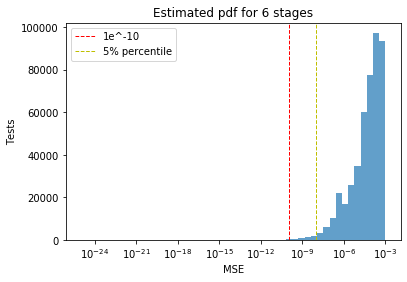

result_06_stages.
8499983
Confidence is 0.00013933713185564187
Boundary is 5.466034175417483e-09
3a8adb6df2fe5000
0.001392824715138877


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



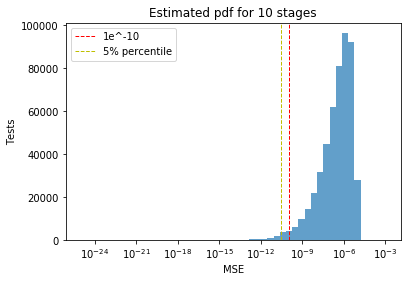

result_10_stages.
8499983
Confidence is 5.418174258268207e-07
Boundary is 2.125753652348943e-11
3a8adb6df2fe5000
5.416048504615858e-06


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



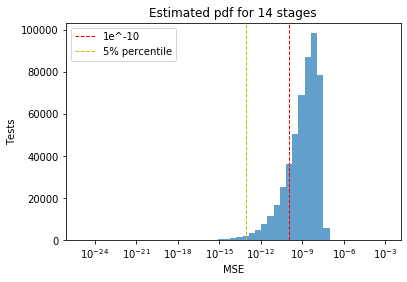

result_14_stages.
8499983
Confidence is 2.1172743833619546e-09
Boundary is 8.296410942116652e-14
3a8adb6df2fe5000
2.1164447422677428e-08


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



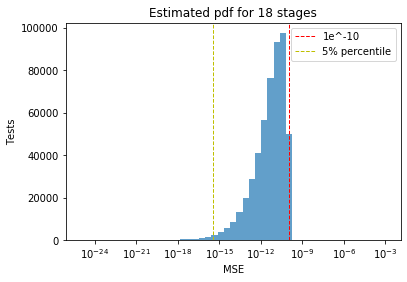

result_18_stages.


In [22]:
########################   PLOTS ESTIMATED PDF OF MSE ERROR  ###############################

import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

testOutput = open("testbenchFinal.txt", "r")


files = ['result_06_stages.txt',
         'result_10_stages.txt',
         'result_14_stages.txt',
         'result_18_stages.txt']

errorList = []
testBench = testOutput.read()
for name in files:

  
  stages = int(name[7:9])
  result1 = open(name, "r")
  result = result1.read()
  print(len(result))
  
  sumError = 0
  count = 0
  countTotal = 0

  for i in range (0, 499999):
    countTotal = countTotal + 1 
    resultNow = result[16*i + i:16*i+16 + i]
    testAccurate = testBench[16 + i + i*32 : 32 + i + i*32]

    mse = (hex2dec(resultNow, 64, 62) - hex2dec(testAccurate, 64, 62))**2
    errorList.append(mse)

    if (mse > math.pow(10,-10)):
      count = count + 1
      #print(mse)
      #print((hex2dec(resultNow, 64, 62) - hex2dec(testAccurate, 64, 62))**2, hex2dec(resultNow, 64, 62), hex2dec(testAccurate, 64, 62))
    sumError = sumError + mse
    #print((hex2dec(resultNow, 64, 62) - hex2dec(testAccurate, 64, 62))**2, hex2dec(resultNow, 64, 62), hex2dec(testAccurate, 64, 62))

  numpyMSE = np.array(errorList)
  meanMSE = sumError / 5000

  boundary = 1.96*np.std(numpyMSE)/math.sqrt(500000)
  confidence = meanMSE + 1.96*np.std(numpyMSE)/math.sqrt(5000)
  print("Confidence is {}".format(confidence)) 
  print("Boundary is {}".format(boundary))


    
  print(testAccurate)
  error = sumError / 500

  print(error)
  errorList.sort()


  MIN, MAX = 10 ** -25, 10.0 ** -3
  print(errorList)
  pl.figure()
  n, bins, patches = pl.hist(errorList, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50), alpha = 0.7)


  thr = 10**-10
  thr1 = errorList[4750]
  pl.gca().set_xscale("log")
  pl.axvline(x=thr, color='r',label='1e^-10', linestyle='dashed', linewidth=1)
  pl.axvline(x=thr1, color='y',label='5% percentile', linestyle='dashed', linewidth=1)
  pl.xlabel('MSE')
  pl.ylabel('Tests')
  pl.title('Estimated pdf for {} stages'.format(stages))
  pl.legend()
  pl.savefig(name[:-3] + 'jpg')
  pl.show()
  print(name[:-3])
  
  errorList.clear()
  
  result1.close()

In [131]:
############################## ANALYSE MSE ERROR AND CONFIDENCE UPPER BOUND ###########################

import csv 
from numpy import pi, arange, zeros, ones, cos, sin, dstack, vstack
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.colors import LogNorm
from matplotlib import cm
from numpy import meshgrid

# Define size of heatmap array ------- can improve by picking size from csv file 
heatmapArray    = np.zeros((BITS, STAGES), dtype = float)
confidenceArray = np.zeros((BITS, STAGES), dtype = float)

# Number of samples per test case used 
SAMPLES  = 50000 
STAGES   = 15
BITS     = 15
MAX_WORD = 64
PREC     = 62

# Open CSV file 
with open('resultTable_18_stages.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    col    = 0
    rowInd = 0 
    mse    = 0 
    numpyMSE = []
    
    # Read line per line 
    for row in csv_reader:
        
        # Convert result table to string 
        testbenchString = row[3].replace("', ", "").replace("'","").replace('[','').replace(']','')
        resultString = row[4].replace("', ", "").replace("'","").replace('[','').replace(']','')

        
        currentStages = row[0]
        currentBits   = row[1]
        
        # Add MSE 
        mse += (hex2dec(resultString, MAX_WORD, PREC) - hex2dec(testbenchString, MAX_WORD, PREC))**2
        numpyMSE.append(mse)
        
        
        if (line_count == 0):
            previousStages = currentStages
            previousBits   = currentBits 
            
            
        # At every test case change reset -> mse and numpyMSE - calculate meanMSE 
        if (previousStages != currentStages and previousBits == currentBits):
            mse = mse / SAMPLES
            meanMSE = mse 
            heatmapArray[rowInd, col] = mse 
            col += 1
            mse = 0 
            print("Bits={}; Stages={}".format(currentBits, currentStages))
            
            confidence = meanMSE + 1.96*np.std(numpyMSE)/math.sqrt(500)
            confidenceArray[rowInd, col] = confidence
            numpyMSE = []
            
        elif (previousBits != currentBits):
            mse = mse / SAMPLES
            meanMSE = mse
            col =  0 
            rowInd += 1
            heatmapArray[rowInd, col] = mse
            print("Bits={}; Stages={}".format(currentBits, currentStages))
            mse = 0 
            
            confidence = meanMSE + 1.96*np.std(numpyMSE)/math.sqrt(SAMPLES)
            confidenceArray[rowInd, col] = confidence
            numpyMSE = []
            
        previousStages = currentStages 
        previousBits   = currentBits 
        line_count += 1
        
    print(f'Processed {line_count} lines.')
    

    
    
    # convert matrix to MATLAB 
    import scipy.io
    scipy.io.savemat('arrdataFinal2.mat', mdict={'arr': heatmapArray})
    scipy.io.savemat('arrdataConfidence.mat', mdict={'arr': confidenceArray})
    

3.0
[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bits=16; Stages=20
Bits=20; Stages=18
Bits=20; Stages=20
Bits=24; Stages=18
Bits=24; Stages=20
Bits=28; Stages=18
Bits=28; Stages=20
Bits=32; Stages=18
Bits=32; Stages=20
Bits=36; Stages=18
Bits=36; Stages=20
Bits=40; Stages=18
Processed 632911 lines.
[[5.71907100e-08 0.0000

ZeroDivisionError: float division by zero

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11b127840> (for post_execute):


ValueError: values must all be positive

ValueError: values must all be positive

<Figure size 432x288 with 2 Axes>